# **1. Introduction**

As part of the Globant's technical interview challenge, this Colab notebook will be used to create a pipeline for clustering peer-reviewed journal publications. See the full challenge description below:




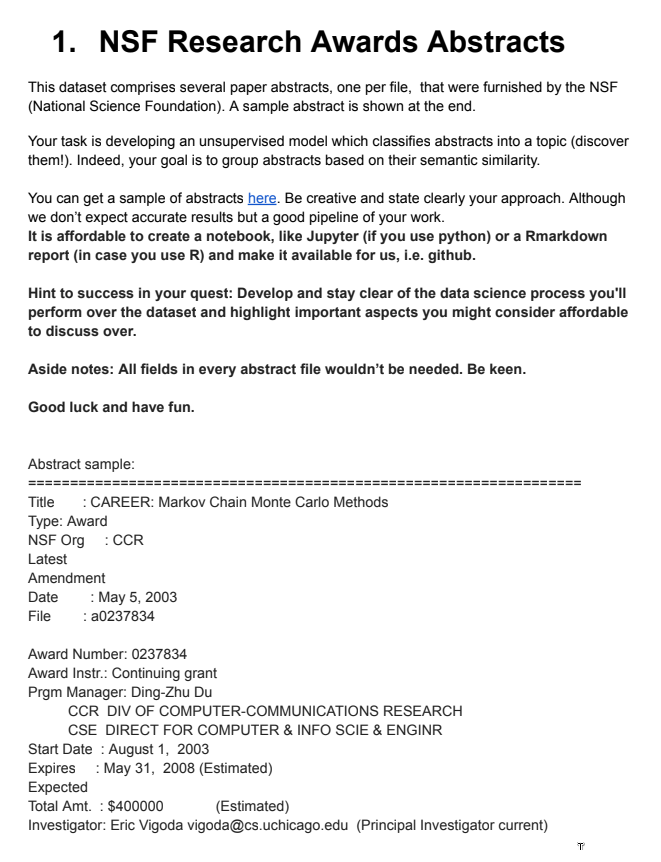

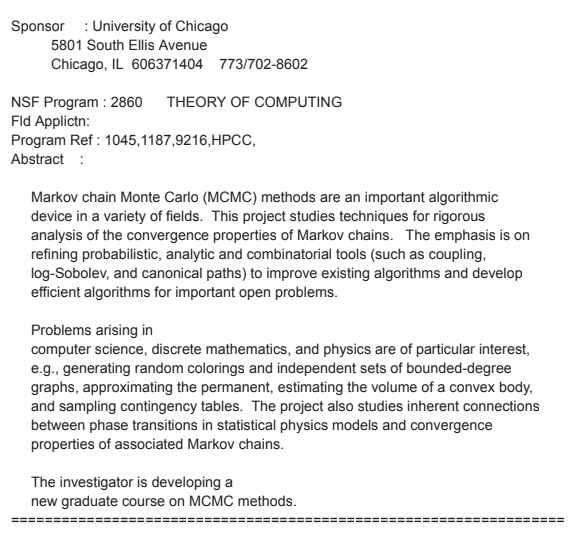

# **2. Objetives**
- Create a pipeline to preprocess the data so that it may be transformed into a numerical and machine-readable structure.
- Examine and select a state-of-the-art model for document clustering.
- Examine the modeling feasibility.

# **3. No objetive**
- Make use of experiment tracking.
- Making use of data versioning technologies.
- Make use of any workflow ochestator.

To be clear, this notebook is purely for proof of concept purposes as part of the Globant's challenge.



# **4. Data preprocessing**

## **4.1. Data visual and initial exploration**

The data is in xml format where each file represents a unique journal paper. Looking in the [website of the NSF](https://www.nsf.gov/awardsearch/download.jsp), the xml schema is:



```
<?xml version="1.0" encoding="UTF-8"?>
   <xsd:schema xmlns:xsd="http://www.w3.org/2001/XMLSchema" attributeFormDefault="unqualified" elementFormDefault="qualified" version="1.0">
         <xsd:element name="rootTag">
               <xsd:complexType>
                     <xsd:sequence>
                           <xsd:element name="Award">
                                 <xsd:complexType>
                                       <xsd:sequence>
                                             <xsd:element name="AwardTitle" type="xsd:string"></xsd:element>
                                             <xsd:element name="AwardEffectiveDate" type="xsd:dateTime"></xsd:element>
                                             <xsd:element name="AwardExpirationDate" type="xsd:dateTime"></xsd:element>
                                             <xsd:element name="AwardAmount" type="xsd:int"></xsd:element>
                                             <xsd:element name="AwardInstrument">
                                                   <xsd:complexType>
                                                         <xsd:sequence>
                                                               <xsd:element name="Value" type="xsd:string"></xsd:element>
                                                         </xsd:sequence>
                                                   </xsd:complexType>
                                             </xsd:element>
                                             <xsd:element name="Organization">
                                                   <xsd:complexType>
                                                         <xsd:sequence>
                                                               <xsd:element name="Code" type="xsd:int"></xsd:element>
                                                               <xsd:element name="Directorate">
                                                                     <xsd:complexType>
                                                                           <xsd:sequence>
                                                                                 <xsd:element name="LongName" type="xsd:string"></xsd:element>
                                                                           </xsd:sequence>
                                                                     </xsd:complexType>
                                                               </xsd:element>
                                                               <xsd:element name="Division">
                                                                     <xsd:complexType>
                                                                           <xsd:sequence>
                                                                                 <xsd:element name="LongName" type="xsd:string"></xsd:element>
                                                                           </xsd:sequence>
                                                                     </xsd:complexType>
                                                               </xsd:element>
                                                         </xsd:sequence>
                                                   </xsd:complexType>
                                             </xsd:element>
                                             <xsd:element name="ProgramOfficer">
                                                   <xsd:complexType>
                                                         <xsd:sequence>
                                                               <xsd:element name="SignBlockName" type="xsd:string"></xsd:element>
                                                         </xsd:sequence>
                                                   </xsd:complexType>
                                             </xsd:element>
                                             <xsd:element name="AbstractNarration" type="xsd:string"></xsd:element>
                                             <xsd:element name="MinAmdLetterDate" type="xsd:dateTime"></xsd:element>
                                             <xsd:element name="MaxAmdLetterDate" type="xsd:dateTime"></xsd:element>
                                             <xsd:element name="ARRAAmount" type="xsd:string"></xsd:element>
                                             <xsd:element name="AwardID" type="xsd:int"></xsd:element>
                                             <xsd:element maxOccurs="unbounded" name="Investigator">
                                                   <xsd:complexType>
                                                         <xsd:sequence>
                                                               <xsd:element name="FirstName" type="xsd:string"></xsd:element>
                                                               <xsd:element name="LastName" type="xsd:string"></xsd:element>
                                                               <xsd:element name="EmailAddress" type="xsd:string"></xsd:element>
                                                               <xsd:element name="StartDate" type="xsd:dateTime"></xsd:element>
                                                               <xsd:element name="EndDate" type="xsd:string"></xsd:element>
                                                               <xsd:element name="RoleCode" type="xsd:int"></xsd:element>
                                                         </xsd:sequence>
                                                   </xsd:complexType>
                                             </xsd:element>
                                             <xsd:element maxOccurs="unbounded" name="Institution">
                                                   <xsd:complexType>
                                                         <xsd:sequence>
                                                               <xsd:element name="Name" type="xsd:string"></xsd:element>
                                                               <xsd:element name="CityName" type="xsd:string"></xsd:element>
                                                               <xsd:element name="ZipCode" type="xsd:int"></xsd:element>
                                                               <xsd:element name="PhoneNumber" type="xsd:decimal"></xsd:element>
                                                               <xsd:element name="StreetAddress" type="xsd:string"></xsd:element>
                                                               <xsd:element name="CountryName" type="xsd:string"></xsd:element>
                                                               <xsd:element name="StateName" type="xsd:string"></xsd:element>
                                                               <xsd:element name="StateCode" type="xsd:string"></xsd:element>
                                                         </xsd:sequence>
                                                   </xsd:complexType>
                                             </xsd:element>
                                             <xsd:element maxOccurs="unbounded" name="FoaInformation">
                                                   <xsd:complexType>
                                                         <xsd:sequence>
                                                               <xsd:element name="Code" type="xsd:int"></xsd:element>
                                                               <xsd:element name="Name" type="xsd:string"></xsd:element>
                                                         </xsd:sequence>
                                                   </xsd:complexType>
                                             </xsd:element>
                                             <xsd:element maxOccurs="unbounded" name="ProgramElement">
                                                   <xsd:complexType>
                                                         <xsd:sequence>
                                                               <xsd:element name="Code" type="xsd:int"></xsd:element>
                                                               <xsd:element name="Text" type="xsd:string"></xsd:element>
                                                         </xsd:sequence>
                                                   </xsd:complexType>
                                             </xsd:element>
                                             <xsd:element maxOccurs="unbounded" name="ProgramReference">
                                                   <xsd:complexType>
                                                         <xsd:sequence>
                                                               <xsd:element name="Code" type="xsd:int"></xsd:element>
                                                               <xsd:element name="Text" type="xsd:string"></xsd:element>
                                                         </xsd:sequence>
                                                   </xsd:complexType>
                                             </xsd:element>
                                       </xsd:sequence>
                                 </xsd:complexType>
                           </xsd:element>
                     </xsd:sequence>
               </xsd:complexType>
         </xsd:element>
   </xsd:schema>
```



As a researcher, I am aware that the ```AbstractNarration``` field must be used to glean insights from a study. Before delving deeper into a paper, someone should read the abstracts and keywords (which are not included in the dataset). The NSF directorate that is evaluating the manuscript (e.g., Direct For Mathematical & Physical Scien) and the NFS division (e.g., Division Of Mathematical Sciences) can provide insights to the unsupervised models that are clustering publications. However, if this model is employed outside of this dataset (for example, utilizing sources such as ScienceDirect and Scopus), it may not be able to cluster well and thus may not scale. Other field that can help build a model is ```AwardTitle```.





## **4.2. Organize xml files**

In [2]:
# Import libraries
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from zipfile import ZipFile
import xml.etree.ElementTree as ET
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
import multiprocessing


In [3]:
def xml_to_dataframe(xml_file: str) -> pd.DataFrame:
    """
    Function to parse th xml files and obtain a dataframe

    Args:
      - xml_file (string): xml file to parse

    Return:
      - df (dataframe): Containing the data from an xml
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Process the XML data and create a dictionary
    record = {"AbstractNarration": root.find('.//AbstractNarration').text,
              "AwardTitle": root.find('.//AwardTitle').text,
              "Directorate": root.find('.//Directorate/LongName').text,
              "Division": root.find('.//Division/LongName').text}

    # Create a DataFrame from the dictionary
    df = pd.DataFrame([record])
    return df

# Access zip file containing the .xml files
zip_path = os.path.join(os.getcwd(),
                        os.pardir,
                        "data",
                        "2020.zip")
zip_file = ZipFile(zip_path)

# Read all XML files into a list of DataFrames
dfs = [xml_to_dataframe(zip_file.open(text_file.filename)) for text_file in zip_file.infolist()]

# Concatenate all DataFrames into one master DataFrame
master_df = pd.concat(dfs, ignore_index=True)

In [4]:
# Check the shape
master_df.shape

(13299, 4)

## **4.2. Text vectorization**

The data preparation process is determined by the models that will be employed. Kmeans and agglomerative hierarchical clustering are two popular approaches for document clustering [ [1] ](https://www.stat.cmu.edu/~rnugent/PCMI2016/papers/DocClusterComparison.pdf). Because of their simplicity, these models are suitable as a starting point for medelling. In addition, our dataset is small (13299).

We will utilize kmeans for clustering in this task. To work with the texts, we must clean, tokenize, lemmatize, and vectorize them [ [2] ](https://spotintelligence.com/2023/01/16/document-clustering-in-python/). Python libraries like ```scikit-learn``` and ```NLTK``` can support this. We'll utilize Term Frequency-Inverse Document Frequency (TF-IDF) for text representation, which is commonly used in information retrieval and text mining applications [ [3] ](https://www.charactell.com/resources/the-role-of-text-representation-in-document-classification/). Unlike bag of words, TF-IDF evaluates the relative relevance of each word in the documents [ [4] ](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).


In [5]:
# Check null values
null_percentage = (master_df.isnull().sum() / len(master_df)) * 100
null_percentage

AbstractNarration    1.060230
AwardTitle           0.000000
Directorate          0.030077
Division             0.000000
dtype: float64

The above command reveals that ```AbstractNarration``` is empty in around 1.06% of the papers, whereas ```AwardTitle``` is empty in 0% of the articles. As a result, ```AwardTitle``` may be a superior field for semantic search. Nonetheless, ```AbstractNarration``` will be employed for the following reasons:

- The percentage of articles using this field is not very high (about 99%).
- This model is built with the intention of being used outside of this dataset.
- This field provides further context. The abstract can be 200-300 words long, whereas the title is much shorter (10-20 words).











In [6]:
# Vectorizing. This applies the steps mentioned before.
vectorizer = TfidfVectorizer(stop_words="english",
                             max_features=5000)
abstracts = master_df.loc[pd.notnull(master_df.AbstractNarration), "AbstractNarration"]
X_tf_idf = vectorizer.fit_transform(abstracts)

# Normalize
X_tf_idf_norm = normalize(X_tf_idf)
X = X_tf_idf_norm.toarray()

**Note:** ```max_features``` should be tuned because k means algorithm has troubles in a high-dimensional space.

# **5. Model**

We can now use kmeans to extract clusters from the vector representation. However, one disadvantage of utilizing kmeans is that we must determine the number of clusters ahead of time. Nonetheless, let us employ the well-known elbow method [ [5] ](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/), and examine the columns ```Directorate``` and ```Division```.

## **5.1. Directorate and Division**

In [8]:
# Number of unique Directorates
master_df.Directorate.str.lower().nunique()

12

In [9]:
# Number of unique Divisions
master_df.Division.str.lower().nunique()

48

## **5.2. Elbow method**

In [10]:
def calculate_distortion(k: int, X: np.array) -> float:
    """
    Function to calculate the inertia

    Args:
      - k (integer): Number of clusters
      - X (array): Training data

    Return:
      - inertia (float): Inertia for the clusters
    """
    kmean_model = KMeans(n_clusters=k, n_init=10)
    kmean_model.fit(X)
    inertia = kmean_model.inertia_
    print(f"The inertia for {k} clusters is {inertia:.4f}")

    return inertia

# Obtain the sums of squared distances of samples to their closest cluster center
num_cpus = multiprocessing.cpu_count() - 1
K = range(2, 30)
with multiprocessing.Pool(processes=num_cpus) as pool:
    distortions = pool.starmap(calculate_distortion, [(k, X) for k in K])

The inertia for 5 clusters is 12173.0470
The inertia for 2 clusters is 12373.7927
The inertia for 8 clusters is 12032.2408
The inertia for 3 clusters is 12301.4865
The inertia for 6 clusters is 12116.2557
The inertia for 9 clusters is 11994.7020
The inertia for 4 clusters is 12234.1453
The inertia for 7 clusters is 12075.5000
The inertia for 10 clusters is 11968.9121
The inertia for 11 clusters is 11934.1339
The inertia for 14 clusters is 11840.8572
The inertia for 17 clusters is 11765.3335
The inertia for 12 clusters is 11897.0130
The inertia for 18 clusters is 11737.5015
The inertia for 15 clusters is 11800.1561
The inertia for 13 clusters is 11866.9966
The inertia for 19 clusters is 11696.8694
The inertia for 16 clusters is 11772.7165
The inertia for 20 clusters is 11684.6334
The inertia for 23 clusters is 11615.6331
The inertia for 26 clusters is 11552.8779
The inertia for 21 clusters is 11671.1634
The inertia for 24 clusters is 11577.4362
The inertia for 27 clusters is 11540.3978


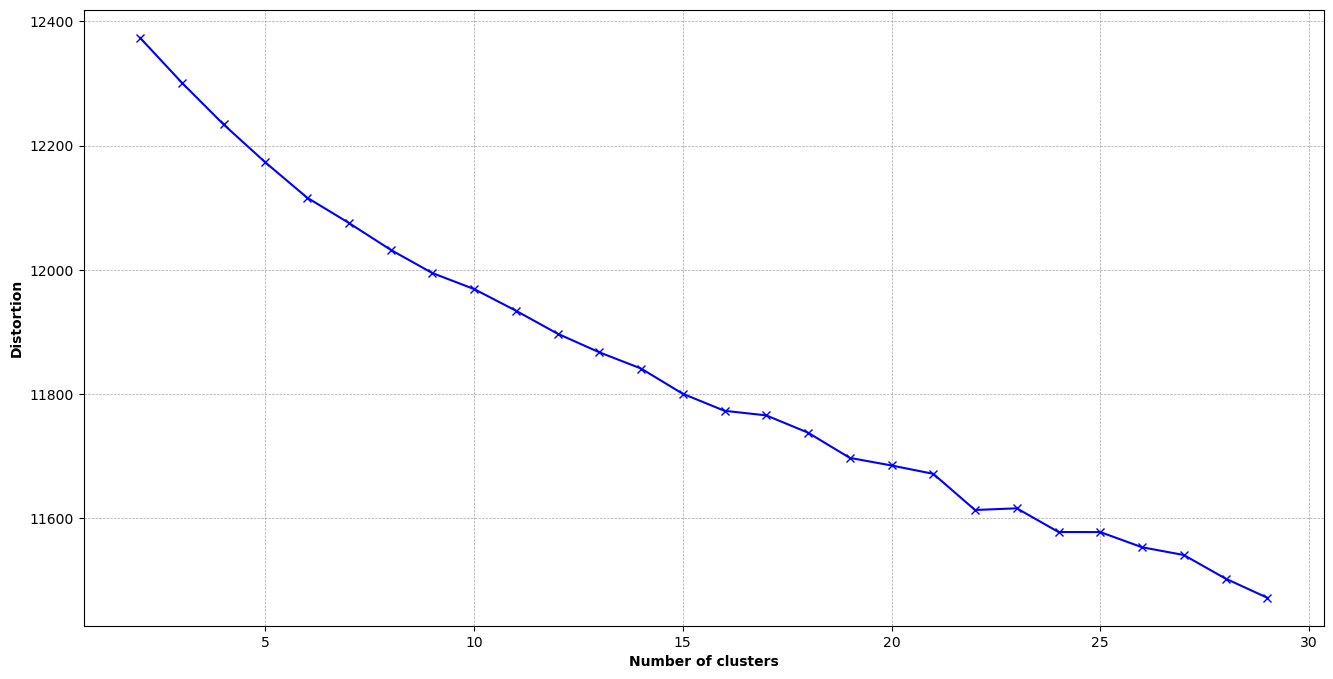

In [13]:
# Plot the distortion
plt.figure(figsize=(16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("Number of clusters", fontweight="bold")
plt.ylabel("Distortion", fontweight="bold")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

The chart above depicts the distortion as a function of the number of clusters. Nonetheless, the plot is not entirely evident since there is not an apparent convergence. The most noticeable changes occur between 8 and 16, roughly. Nonetheless, we can identify the change rate by estimating the derivatives.

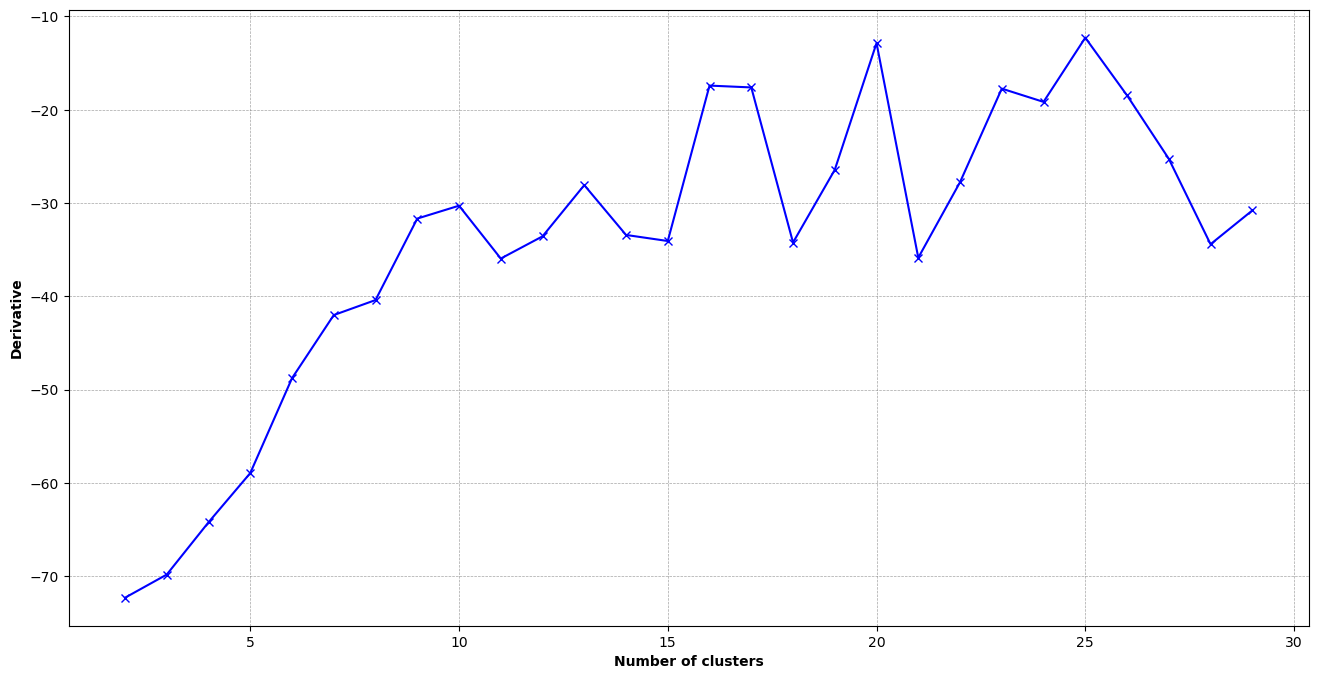

In [15]:
dy_dx = np.gradient(distortions, K)

# Plot derivatives
plt.figure(figsize=(16,8))
plt.plot(K, dy_dx, "bx-")
plt.xlabel("Number of clusters", fontweight="bold")
plt.ylabel("Derivative", fontweight="bold")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

The derivatives are depicted in the image above. It demonstrates that the derivative has oscillated around -25 since around 16. As a result, 16 may be an acceptable value for the number of clusters. This value is close to the one obtained previously for the number of NSF directorates (i.e., 12).

## **5.3. Final model**

In [7]:
# Traing the final model
final_k = 16
model = KMeans(n_clusters=final_k,
              n_init=10,
              random_state=0,
              verbose=1)
model.fit(X)

Initialization complete
Iteration 0, inertia 22608.53853532998.
Iteration 1, inertia 11995.57149860444.
Iteration 2, inertia 11900.15043104963.
Iteration 3, inertia 11876.707819796145.
Iteration 4, inertia 11865.011136513223.
Iteration 5, inertia 11857.374857778172.
Iteration 6, inertia 11852.29932358112.
Iteration 7, inertia 11848.613783679315.
Iteration 8, inertia 11845.489492044879.
Iteration 9, inertia 11842.657780840307.
Iteration 10, inertia 11840.60794452058.
Iteration 11, inertia 11838.858388953127.
Iteration 12, inertia 11836.942034105201.
Iteration 13, inertia 11835.474850697034.
Iteration 14, inertia 11834.072198909997.
Iteration 15, inertia 11831.694416820668.
Iteration 16, inertia 11828.255386514353.
Iteration 17, inertia 11826.611966980281.
Iteration 18, inertia 11826.005026909137.
Iteration 19, inertia 11825.39808347605.
Iteration 20, inertia 11824.837895812998.
Iteration 21, inertia 11824.318228741566.
Iteration 22, inertia 11823.879276081952.
Iteration 23, inertia 1182

KMeans(n_clusters=16, n_init=10, random_state=0, verbose=1)

# **6. Evaluation**

## **6.1. Silhouette Score**

For evaluating the resulting model, let's use the silhouette score that is widely used to calculate the goodness of fit of a clustering algorithm [ [6] ](https://heartbeat.comet.ml/how-to-evaluate-clustering-based-models-in-python-503343816db2).

In [8]:
# Obtain Silhouette Score
labels = model.labels_
score = silhouette_score(X,labels)

if score == 0:
    print("Clusters are overlapping")
elif score < 0:
    print("Samples likely assigned to the wrong cluster")
else:
    print("Clusters are very dense and nicely separated")

Clusters are very dense and nicely separated


In [11]:
print(f"The Silhouette Score is {score:.4f}")

The Silhouette Score is 0.0130


The clusters are dense and well divided, as shown by the silhouette score. Nonetheless, the value is not optimal (closer to 1 is better) because it is closer to "0," indicating potential cluster overlap.

## **6.2. Important words**

Let's see the top 10 of words for each of the 16 clusters.

In [12]:
def get_top_features_cluster(X: np.array, labels: np.array, n_features: int) -> list:
    """
    Function to get the top features for each clusters

    Agrs:
        - X (array): Training data
        - labels (array): Label predicted by the model
        - n_features (integer): Number of desired features

    Returns:
        - dfs (list): List of dataframes containing the top n_features for the clusters
    """
    unique_labels = np.unique(labels)
    dfs = []
    for label in unique_labels:
        id_temp = np.where(labels==label)
        x_means = np.mean(X[id_temp], axis = 0)
        sorted_means = np.argsort(x_means)[::-1][:n_features]
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score']).sort_values(by="score", ascending=True)
        dfs.append(df)
    return dfs

dfs = get_top_features_cluster(X, labels, 10)

Cluster 1



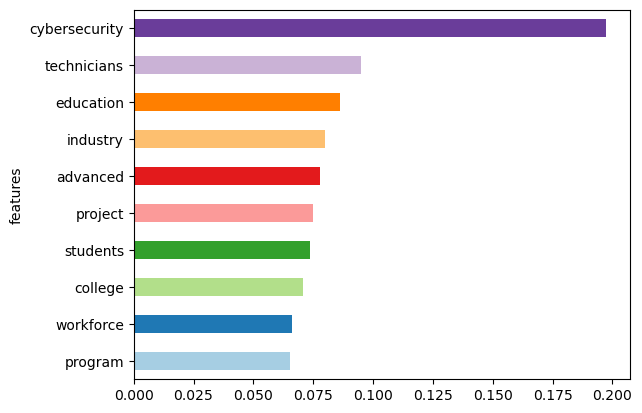

Cluster 2



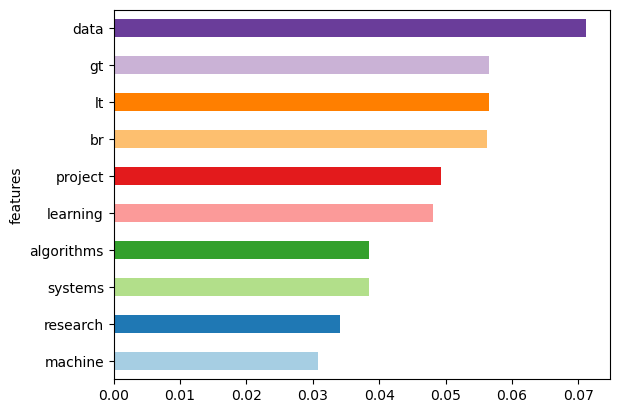

Cluster 3



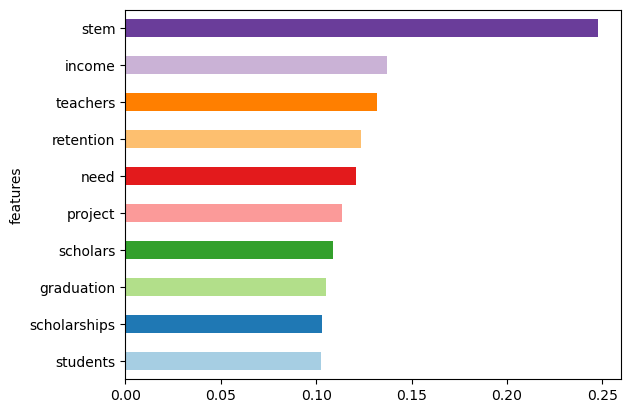

Cluster 4



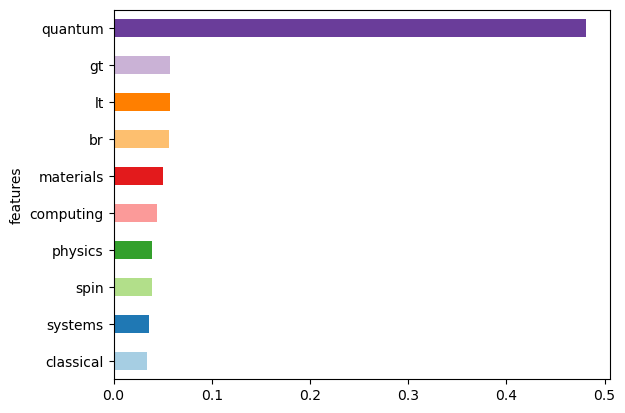

Cluster 5



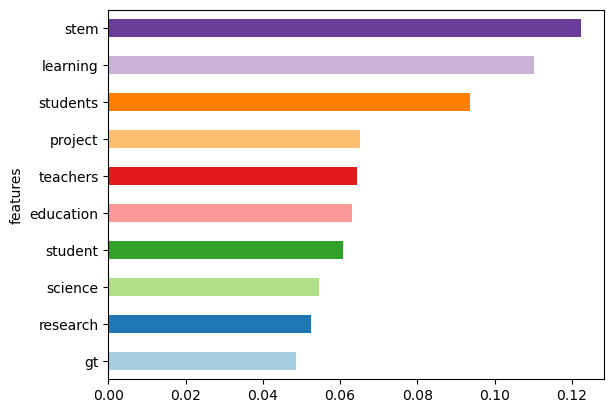

Cluster 6



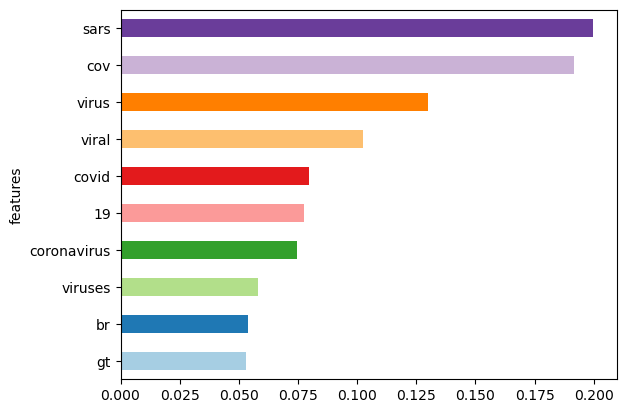

Cluster 7



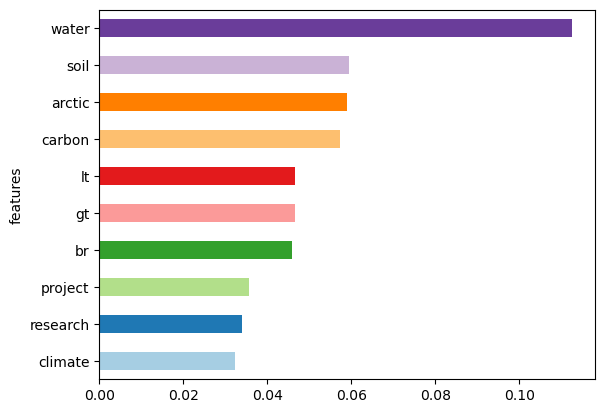

Cluster 8



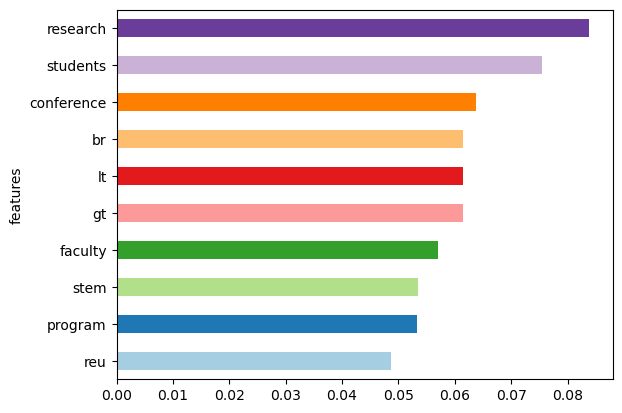

Cluster 9



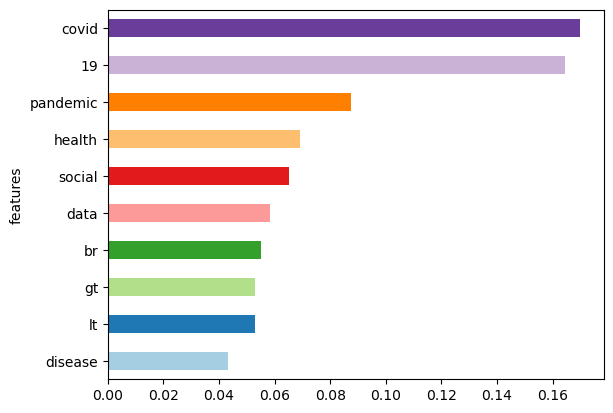

Cluster 10



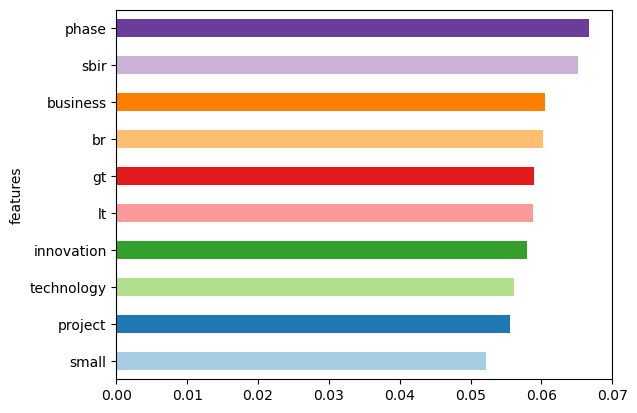

Cluster 11



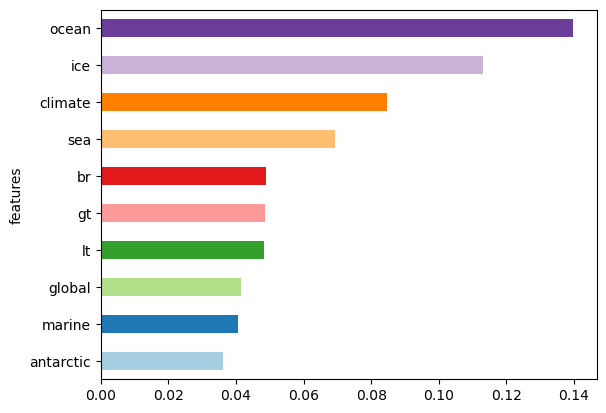

Cluster 12



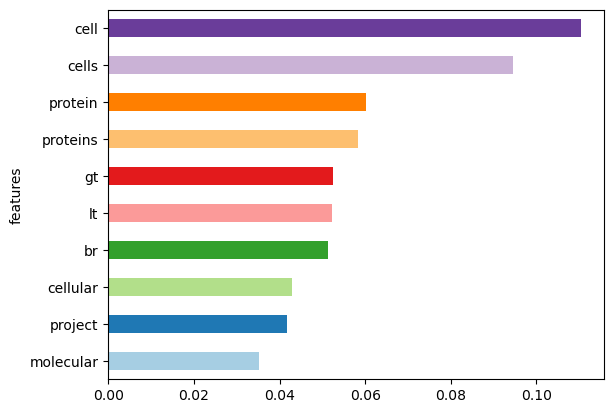

Cluster 13



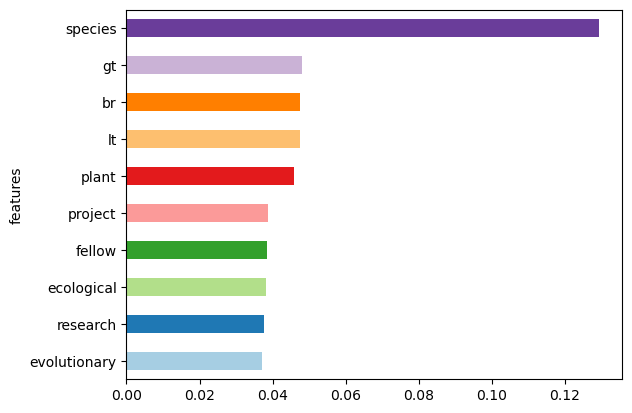

Cluster 14



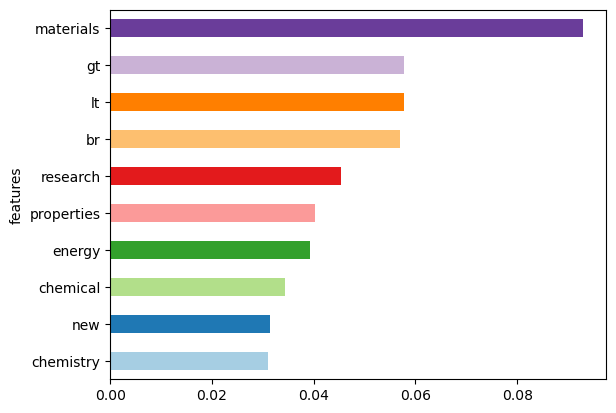

Cluster 15



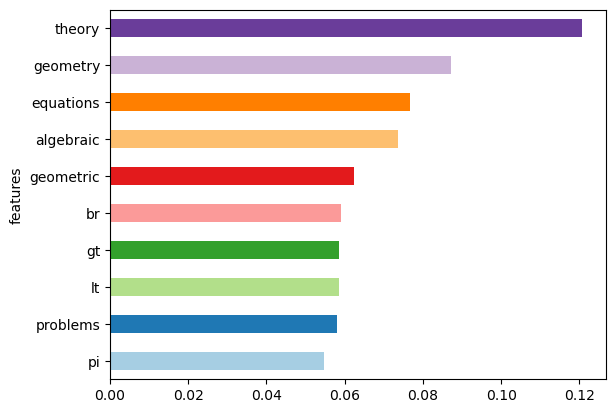

Cluster 16



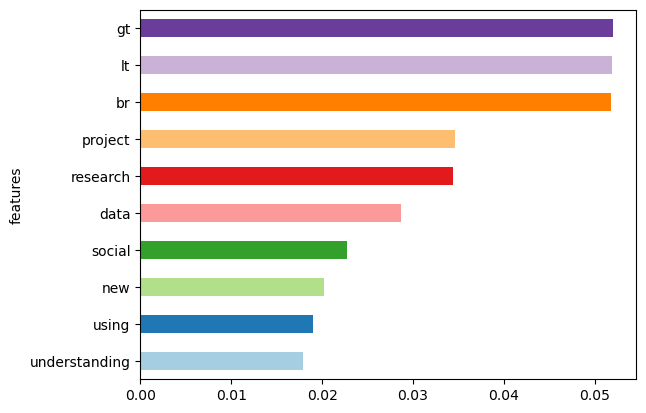

In [13]:
for i, df in enumerate(dfs):
   print(f"Cluster {i + 1}\n")
   df.plot(kind="barh", y="score", x="features", legend=False, color=sns.color_palette("Paired")[0:10])
   plt.show()

## **6.3. Analysis**

Some clusters have a distinct topic that they represent. Some examples:

- **Cluster 1**: Technology education, specifically cybersecurity education. Cybersecurity concerns and attacks rose around 2020 as a result of remote work.
- **Cluster 2**: Algorithms for machine learning
- **Cluster 3**: STEM education fortification and retention.
- **Cluster 4**: Material physics. Probably related to quantum-scale computer simulation.
- **Cluster 5**: STEM education strategy.
- **Cluster 6**: It is clearly tied to Covid-19. Make a stronger conclusion given that the dataset is for 2019.
- **Cluster 7**: It is relevant to environmental and climate sciences.
- **Cluster 8**: It is related to STEM, although the topic is not quite obvious.
- **Cluster 9**: Covid-19, but from a health and social perspective.


According to the above, it is possible to lower the number of clusters while possibly sacrificing some granularity. Some examples:

- Clusters 3, 5, and 8.
- Clusters 6 and 9 can be mixed as well.
- Clusters 7 and 11.

Depending on the scientific and intellectual environment, additional words can be included in the stop words:

- Numeric data. Regardless of covid 19, because covid and sars would allow you to identify the topic.
- Look at how "gt", "lt", and "br" appear in clusters like 2, 4, 5, 6, and 7. The letters "gt" and "lt" are derived from inequality, whereas "br" is derived from line break elements.

**These data, when combined with the silhouette score, provide insights on potential cluster overlaps and alternate solutions for future trial runs.**

# **Conclusion**


The data provided can be used to build clustering algorithms based on the semantics of the texts. Despite its simplicity, the Kmeans method appears to be useful as a starting point and benchmark for the creation of more robust models. A favorable silhouette score is attained utilizing 16 clusters in this case. However, it is vital to continue investigating novel data processing alternatives and other hyperparameters that could aid in the improvement of the kmeans argorithm implementation.

